# Heart Disease Prediction Using Decision Trees
### GITHUB Repository Link: https://github.com/Rudransh911/Heart-Disease-Prediction
### Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data 

# Data Loading

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'heart_disease_uci.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


# Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Handle missing values for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# Step 2: Handle missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Step 3: Encode categorical columns (e.g., 'sex', 'dataset', 'slope', 'cp', 'thal', etc.)
label_encoder = LabelEncoder()

# Encode the 'sex' column (Male = 1, Female = 0)
data['sex'] = label_encoder.fit_transform(data['sex'])

# Encode the 'dataset' column (Cleveland = 0, etc.)
data['dataset'] = label_encoder.fit_transform(data['dataset'])

# Encode the 'cp' column
data['cp'] = label_encoder.fit_transform(data['cp'])

# Encode the 'slope' column (downsloping, flat, upsloping)
data['slope'] = label_encoder.fit_transform(data['slope'])

# Encode the 'thal' column
data['thal'] = label_encoder.fit_transform(data['thal'])

# Mapping the 'restecg' column to numeric values
restecg_mapping = {
    'normal': 0,
    'lv hypertrophy': 1,
    'st-t wave abnormality': 2
}

# Apply the mapping
data['restecg'] = data['restecg'].map(restecg_mapping)

# Step 4: Feature scaling (standardization) for numerical features
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 5: Split the data into features (X) and target (y)
X = data.drop('num', axis=1)  # Assuming 'num' is the target column (heart disease diagnosis)
y = data['num']

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display first few rows after preprocessing
print("Preprocessed data:\n", data.head())


Preprocessed data:
          id       age  sex  dataset  cp  trestbps      chol    fbs  restecg  \
0 -1.730169  1.007386    1        0   3  0.698041  0.311021   True      1.0   
1 -1.726404  1.432034    1        0   0  1.511761  0.797713  False      1.0   
2 -1.722639  1.432034    1        0   0 -0.658158  0.274289  False      1.0   
3 -1.718873 -1.752828    1        0   2 -0.115679  0.467130  False      0.0   
4 -1.715108 -1.328180    0        0   1 -0.115679  0.044717  False      1.0   

     thalch  exang   oldpeak  slope        ca  thal       num  
0  0.495698  False  1.349421      0 -1.249371     0 -0.871794  
1 -1.175955   True  0.589832      1  4.292099     1  0.879408  
2 -0.340128   True  1.634267      1  2.444942     2  0.003807  
3  1.968345  False  2.488805      0 -1.249371     1 -0.871794  
4  1.371326  False  0.494884      2 -1.249371     1 -0.871794  


# Exploratory Data Analysis

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    int32  
 3   dataset   920 non-null    int32  
 4   cp        920 non-null    int32  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   741 non-null    float64
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int32  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int32  
 15  num       920 non-null    float64
dtypes: float64(9), int32(5), object(2)
memory usage: 97.2+ KB
None

Statistical Summary:

               id           age         sex     dataset          cp  \
count  920.00000

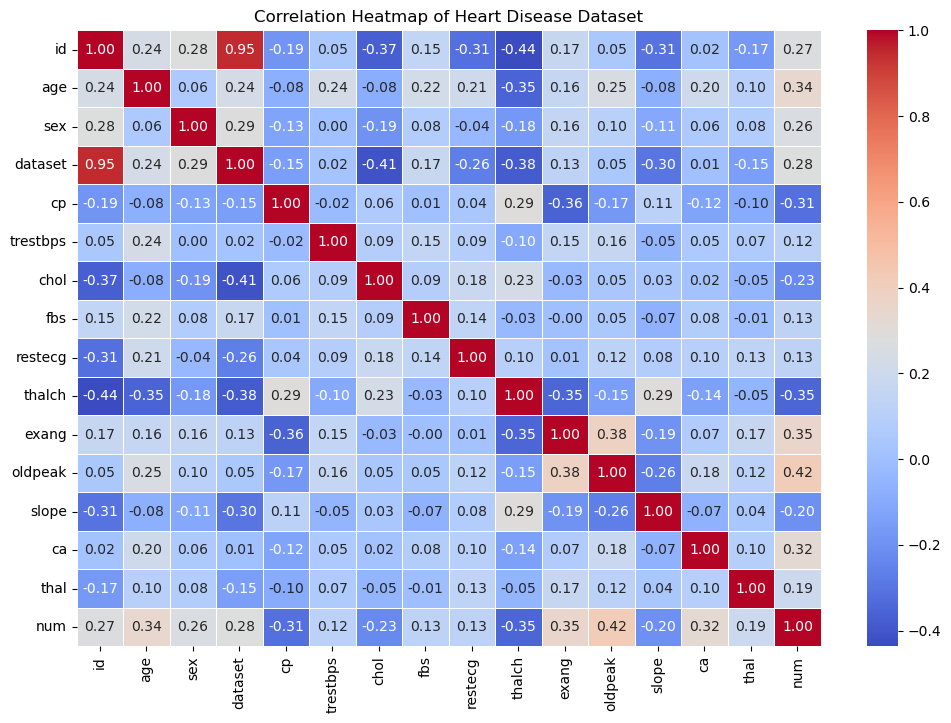

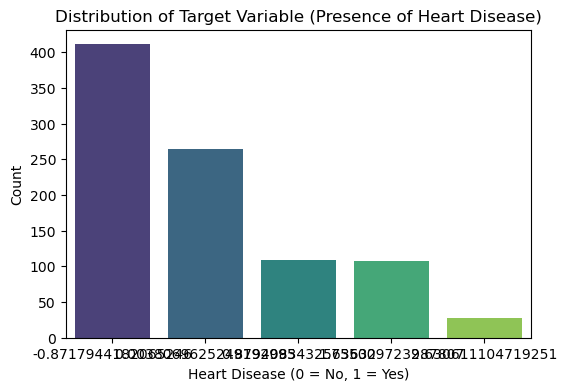

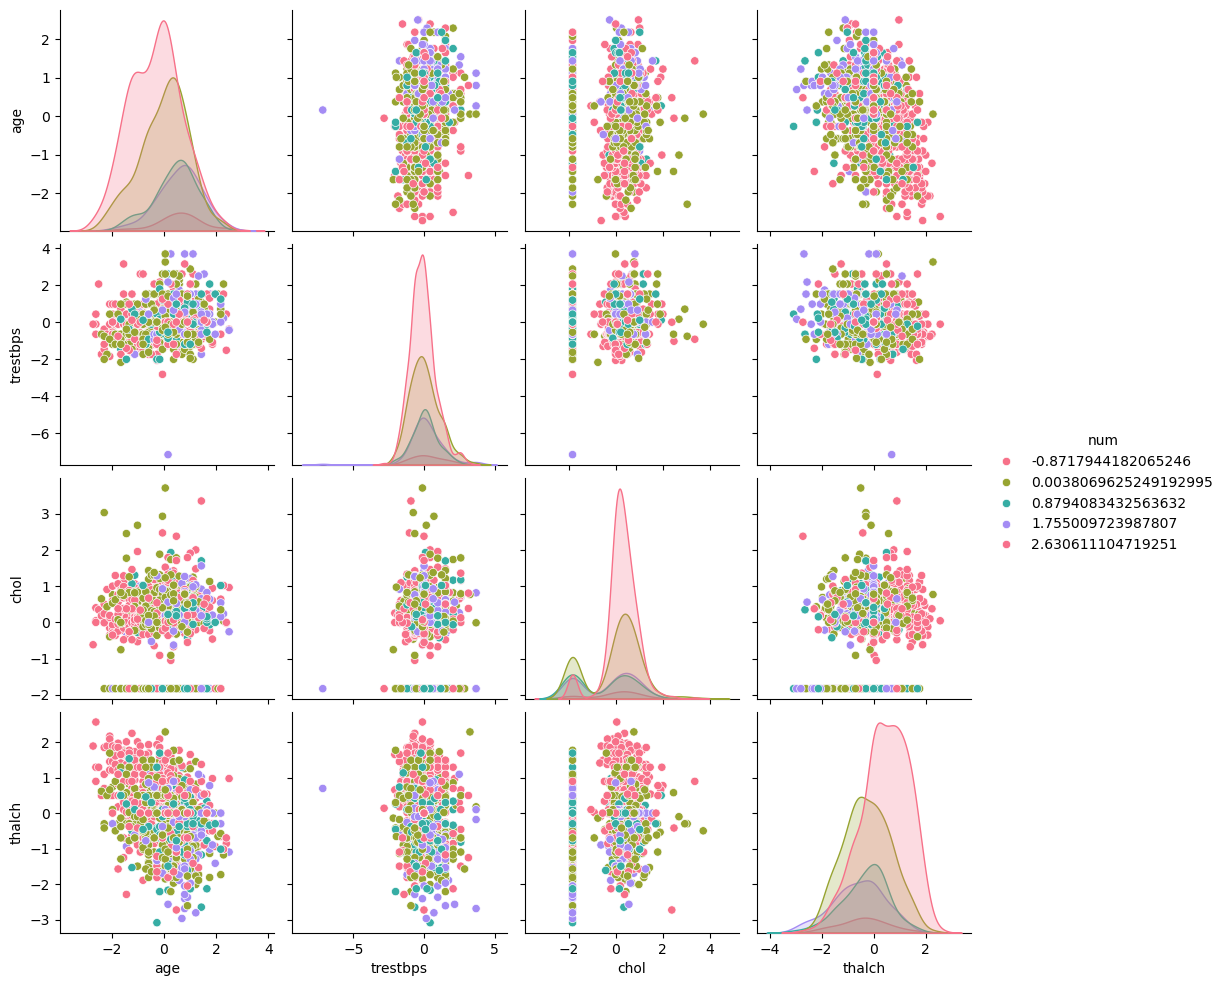

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: General info about the dataset
print("Dataset Info:\n")
print(data.info())

# Step 2: Statistical Summary
print("\nStatistical Summary:\n")
print(data.describe())

# Step 3: Check missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Step 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

# Step 5: Count Plot of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=data, palette='viridis')
plt.title("Distribution of Target Variable (Presence of Heart Disease)")
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Step 6: Pair Plot of Selected Features (to explore relationship)
selected_features = ['age', 'trestbps', 'chol', 'thalch', 'num']
sns.pairplot(data[selected_features], hue='num', palette='husl')
plt.show()



# Appling Decision Tree Model

### Splitting the data

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (736, 15)
Testing data shape: (184, 15)


### Model Training and Evaluation

In [5]:
# Check unique values in the target variable
print("Unique values in target variable:", y.unique())


Unique values in target variable: [-0.87179442  0.87940834  0.00380696  1.75500972  2.6306111 ]


In [6]:
# If the target variable is continuous but you want binary classification
y = (y > 0.5).astype(int)  # Convert continuous to binary (e.g., 0 or 1)


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Use DecisionTreeRegressor if y is continuous
dt_model = DecisionTreeRegressor(random_state=42)


In [8]:
# Train the model using the training data
dt_model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = dt_model.predict(X_test)

# If you're using DecisionTreeClassifier, calculate accuracy
if isinstance(dt_model, DecisionTreeClassifier):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# For regression, you can use different evaluation metrics (e.g., MSE, RMSE)
else:
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.0625153987738956


Accuracy: 73.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       129
           1       0.59      0.42      0.49        55

    accuracy                           0.74       184
   macro avg       0.68      0.65      0.66       184
weighted avg       0.72      0.74      0.72       184


Confusion Matrix:
 [[113  16]
 [ 32  23]]


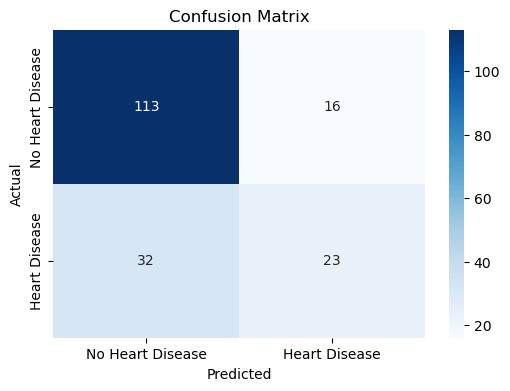

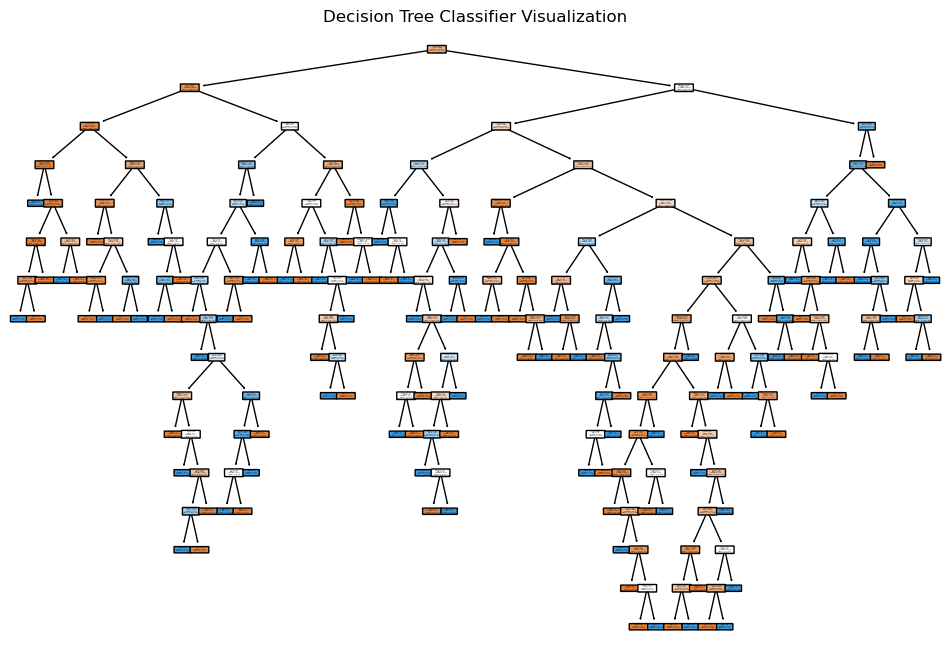

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the preprocessed data, with X and y split

# Step 1: Train-Test Split (if you haven't done so already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Train the model using the training data
dt_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 6: Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix (True Positives, False Positives, etc.)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 8: Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optionally: Visualize the trained decision tree (for better understanding)
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], rounded=True, proportion=True)
plt.title("Decision Tree Classifier Visualization")
plt.show()
